In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.metrics import silhouette_score


In [18]:
df = pd.read_csv("selected_features.csv")
df.head()


,LotFrontage,ZoningScore,EVI,LotArea,Price_per_m^2_norm,PDI,MSZoning_RL,LotConfig_CulDSac,LandContour_HLS,LotShape_IR2,Condition1_Norm,Condition1_Feedr,LotShape_Reg,MSZoning_RM,SalePrice
0,70.0,0.795605,0.344162,8400,0.168856,0.359777,True,False,False,False,True,False,True,False,145000
1,59.0,0.795605,0.415263,7837,0.226847,0.422145,True,False,False,False,True,False,False,False,178000
2,67.0,0.795605,0.314380,8777,0.088239,0.376095,True,False,False,False,False,True,True,False,85000
3,60.0,0.795605,0.413210,7200,0.243793,0.405462,True,False,False,False,False,True,True,False,175000
4,50.0,0.795605,0.419031,5000,0.255437,0.402378,True,False,False,False,True,False,True,False,127000


In [19]:
X = df.drop(columns=["SalePrice"])
Y = df["SalePrice"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


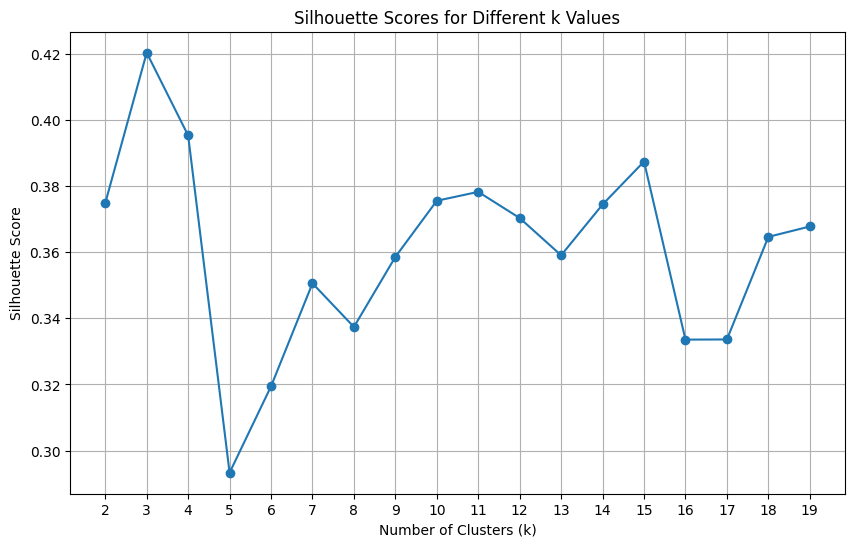

In [20]:
silhouette_scores = []
k_range = range(2, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k Values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_range)
plt.grid()
plt.show()

In [21]:
best_k = np.argmax(silhouette_scores) + 2 
best_score = max(silhouette_scores)
print(f"Valoarea optimă k (Silhouette) = {best_k}, cu scor = {best_score:.4f}")


Valoarea optimă k (Silhouette) = 3, cu scor = 0.4203


Metoda Elbow a sugerat k = 10-12 ca punct de inflexiune, în timp ce metoda Silhouette indică k = 3 (scor 0.42).
Aceasta arată că, deși la k=10 variația internă a clusterelor scade, separarea dintre ele este mai bună pentru k=3 din cate se poate observa ( nu inteleg exact de ce )

In [26]:
k_opt = 3  # după Silhouette
kmeans_opt = KMeans(n_clusters=k_opt, random_state=42)
df["Cluster"] = kmeans_opt.fit_predict(X_scaled)
df.head()

,LotFrontage,ZoningScore,EVI,LotArea,Price_per_m^2_norm,PDI,MSZoning_RL,LotConfig_CulDSac,LandContour_HLS,LotShape_IR2,Condition1_Norm,Condition1_Feedr,LotShape_Reg,MSZoning_RM,SalePrice,Cluster
0,70.0,0.795605,0.344162,8400,0.168856,0.359777,True,False,False,False,True,False,True,False,145000,0
1,59.0,0.795605,0.415263,7837,0.226847,0.422145,True,False,False,False,True,False,False,False,178000,0
2,67.0,0.795605,0.314380,8777,0.088239,0.376095,True,False,False,False,False,True,True,False,85000,0
3,60.0,0.795605,0.413210,7200,0.243793,0.405462,True,False,False,False,False,True,True,False,175000,0
4,50.0,0.795605,0.419031,5000,0.255437,0.402378,True,False,False,False,True,False,True,False,127000,0


In [23]:
df["Cluster"].value_counts().sort_index()


Cluster
0    889
1     88
2    191
Name: count, dtype: int64

Distribuția e puțin dezechilibrată, ceea ce arată că datele nu sunt perfect separate, dar se disting câteva grupuri clare. De aceea cred ca Elbow method este o solutie mai buna in acest caz pentru determinarea numarului de clusters

In [24]:

fig_box = px.box(
    df,
    x=df["Cluster"].astype(str),
    y="SalePrice",
    color=df["Cluster"].astype(str),
    title="Distribuția prețului de vânzare (SalePrice) pe clustere"
)
fig_box.show()

In [25]:
fig = px.scatter(
    df,
    x="LotArea",
    y="LotFrontage",
    color="Cluster",
    size="SalePrice",
    hover_data=["SalePrice", "ZoningScore", "EVI"],
    title="Clusters by LotArea and LotFrontage (Plotly Interactive)"
)
fig.show()


Clusterele nu sunt complet separate, ceea ce înseamnă că unele locuințe au caracteristici similare și pot fi greu de încadrat într-un singur grup.
Acest lucru se observa și din numarului entitatilor din fiecare cluster (0 - 889, 1  - 88, 2 - 191).

Clusterul 0 “înghite” multe exemple care sunt apropiate ca valori, dar care diferă doar ușor la anumite variabile (cum ar fi LotArea sau EVI).